In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load the dataset
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [ ]:
#explore the dataset
print(data.columns)

In [ ]:
print(data.shape)

In [ ]:
print(data.describe())

In [ ]:
data.corrwith(data.Class).plot.bar(
        figsize = (20,10),title = "Correlation with Class",
        fontsize =15,
        rot =45,
    color=(0.8, 0.8, 0.6, 0.9),
        grid=True
    )

In [ ]:
corr = data.corr()
mask =  np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax= plt.subplots(figsize=(18,15))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [ ]:
#sampling dataset
data = data.sample(frac=0.1,random_state=1)
print(data.shape)

In [ ]:
#plot histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

In [ ]:
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print("Fraud Case : {}".format(len(Fraud)))
print("Valid Case : {}".format(len(Valid)))

In [ ]:
#seeing the corelation matrix
corrmat =data.corr()
fig =plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=.8,square=True)

In [ ]:
#get all the columns from the Dataframe
columns= data.columns.tolist()

#filter the columns to remove the data we don't need
columns = [c for c in columns if c not in ['Class']]

#store the variable we target to predict
target ='Class'
X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

# Applying algorithm to the dataset

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define random state
state =1

#define outlier detection method
classifiers ={
    "Isolation Forest": IsolationForest(max_samples=len(X), contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

In [ ]:
#fit the model
n_outliers = len(Fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] =0
    y_pred[y_pred == -1] =1
    
    n_errors = (y_pred != Y).sum()
    
    #Run classification metrics
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

In [4]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)
data = data.drop(['Time'],axis=1)
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.338516


# Model Training For Neural Network


In [5]:
X = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#decision tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
classfier = DecisionTreeClassifier(random_state=0,
                                   criterion='gini',
                                  splitter='best',
                                   min_samples_leaf=1,
                                   min_samples_split=2
                                  )
classfier.fit(X_train,y_train)

In [ ]:
#prediction of test set
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
y_pred = classfier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [ ]:
results = pd.DataFrame([['Decision Tree',acc,prec,rec,f1]],
                      columns = ['Model','Accuracy','Precision','Recall','F1 Score'])
results

In [ ]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm,index=('Valid','Fraud'),columns=('Valid','Fraud'))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt='g')
print("Test data Accuracy: %0.4f "%accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0,
                                   n_estimators=100,
                                   criterion='entropy',
                                   )
classfier.fit(X_train,y_train)

In [ ]:
#prediction on test data
y_pred = classfier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec =precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [ ]:
another = pd.DataFrame([['Random Forest',acc,prec,rec,f1]],
                      columns = ['Model','Accuracy','Precision','Recall','F1 Score'])

In [ ]:
results= results.append(another,ignore_index=True)

In [ ]:
results

# Artificial Neural Network


In [6]:
import keras 
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [7]:
classfier = Sequential()

In [10]:
classfier.add(Dense(units=15,kernel_initializer='uniform',activation='relu',input_dim=29))

classfier.add(Dense(units=12,kernel_initializer='uniform',activation='relu'))
classfier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [11]:
classfier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


In [12]:
classfier.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [16]:
classfier.fit(X_train, y_train, batch_size = 32, epochs = 50,validation_split=0.1)

Train on 179427 samples, validate on 19937 samples
Epoch 1/50
179427/179427 [==============================] - 18s 101us/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 2/50
179427/179427 [==============================] - 19s 103us/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 3/50
179427/179427 [==============================] - 19s 106us/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/50
179427/179427 [==============================] - 18s 102us/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 5/50
179427/179427 [==============================] - 18s 102us/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 6/50
179427/179427 [==============================] - 18s 102us/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 7/50
179427/179427 [=================

In [17]:
y_pred = classfier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classfier.evaluate(X_test,y_test)
score

85443/85443 [==============================] - 5s 56us/step


[0.004735161827226954, 0.9993796944618225]

In [23]:
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.82      0.82       147

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Test data accuracy: 0.9994


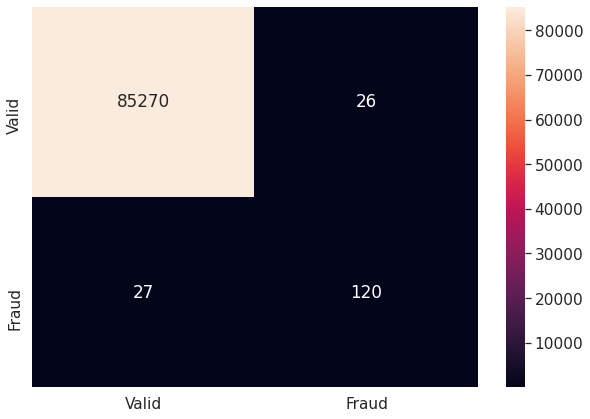

In [24]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm,index=("Valid","Fraud"),columns=("Valid","Fraud"))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt='g')
print("Test data accuracy: %0.4f" %accuracy_score(y_test,y_pred))